In [120]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import point
from pycolorname.pantone.pantonepaint import PantonePaint

In [153]:
# read in clean data csv
dd_dat = pd.read_csv('doordash_data.csv')
dd_dat.head(3)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,city_slug,latitude,longitude,...,delivery_fee_raw,delivery_fee,delivery_time_raw,delivery_time,service_fee_raw,service_fee,phone,review_count,review_rating,RunDate
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29,NaN,NaN,NaN,1364,4.8,4/25/2022 7:01
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29,NaN,NaN,NaN,1364,4.8,4/25/2022 7:01
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29,NaN,NaN,NaN,1364,4.8,4/25/2022 7:01


In [152]:
# get list of foods/services with counts
clean_dd = dd_dat.drop(['city_slug', 'delivery_fee_raw', 'delivery_fee', 'service_fee_raw', 'service_fee', 'phone', 'RunDate', 'delivery_time_raw'], axis=1)
clean_dd.head(3)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,loc_number,url,address,cuisines,delivery_time,review_count,review_rating
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8


In [154]:
clean_dd['cuisines split'] = clean_dd['cuisines'].str.split('|')
# clean_dd['cuisines'].loc[0].split("|")[0]
# t.split("|")
clean_dd.head(3)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,loc_number,url,address,cuisines,delivery_time,review_count,review_rating,cuisines split
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."


In [155]:
cleaner_dd = clean_dd.drop_duplicates(subset=['loc_name', 'latitude', 'longitude'], keep='last')
cleaner_dd.head(3)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,loc_number,url,address,cuisines,delivery_time,review_count,review_rating,cuisines split
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"[Vietnamese, Bubble Tea, Smoothies, Sandwiches..."
5,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.672978,-73.950462,0.404577,Taqueria Milear,133345,https://www.doordash.com/store/133345/?pickup=...,"752 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican|Tacos|Burritos|Dessert|Brunch,28,2000,4.6,"[Mexican, Tacos, Burritos, Dessert, Brunch]"
8,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.674537,-73.950007,0.298770,Cielito Lindo,328460,https://www.doordash.com/store/328460/?pickup=...,"665 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican|Breakfast|Burritos|Salads|Soup,25,163,4.7,"[Mexican, Breakfast, Burritos, Salads, Soup]"


In [125]:
# Count of orders by metro area - New York City, Chicago, Los Angeles, Boston --> Shows 4 markets analyzed
cleaner_dd['searched_metro'].value_counts()

NY    1620
LA     875
CH     848
BO     730
Name: searched_metro, dtype: int64

In [126]:
#refining definition for cuisine
int_cuisines = ['Indian',
'Italian',
'Japanese',
'Mexican',
'Thai',
'Chinese',
'French',
'Turkish',
'Greek',
'Arab',
'Spanish',
'Vietnamese',
'Korean',
'Malaysian',
'Russian',
'Ethiopian',
'Caribbean',
'African',
'American']

In [127]:
#refining definition for convenience
convenience = ['Grocery',
              'Home Goods',
              'Beer,Wine & Spirits',
               'Personal Care',
               'Baby',
               'Medicine',
               'Convenience',
               'Gifts',
               'Florist',
               'Pet Care',
               'Grooming'
              ]

In [128]:
NY = cleaner_dd['searched_metro'] == 'NY'
NY_temp = cleaner_dd['cuisines split'].where(NY)
NY_temp = NY_temp.explode().dropna()
NY_temp.value_counts()
NY_cuisine_types = NY_temp.reset_index()
NY_cuisine_types = NY_cuisine_types.drop(columns='index')
NY_cuisine_types
#all_cuisine_types.values
NY_cuisines = {'cuisine': NY_cuisine_types['cuisines split'].value_counts().index, 'count': NY_cuisine_types['cuisines split'].value_counts().values}
NY_cuisines = pd.DataFrame(NY_cuisines)
final_NY_con = NY_cuisines[NY_cuisines['cuisine'].isin(convenience)] #or NY_cuisines['cuisine'].isin("Convenience")]
final_NY_con


,cuisine,count
47,Grocery,34
61,Convenience,24
120,Personal Care,10
123,Florist,10
142,Home Goods,8
154,Baby,7
165,Medicine,6
265,Pet Care,2


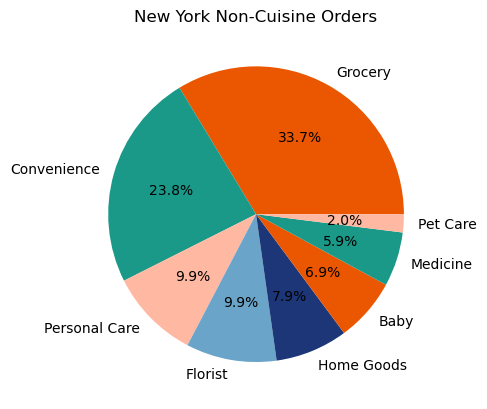

In [147]:
labels = final_NY_con['cuisine']
sizes = final_NY_con['count']
colors = {'#1A9988', '#6AA4C8', '#EB5600', '#1C3678', '#FFB8A2'}
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("New York Non-Cuisine Orders")
plt.show()

In [102]:
CH = cleaner_dd['searched_metro'] == 'CH'
CH_temp = cleaner_dd['cuisines split'].where(CH)
CH_temp = CH_temp.explode().dropna()
CH_temp.value_counts()
CH_cuisine_types = CH_temp.reset_index()
CH_cuisine_types = CH_cuisine_types.drop(columns='index')
CH_cuisine_types
#all_cuisine_types.values
CH_cuisines = {'cuisine': CH_cuisine_types['cuisines split'].value_counts().index, 'count': CH_cuisine_types['cuisines split'].value_counts().values}
CH_cuisines = pd.DataFrame(CH_cuisines)
final_CH_con = CH_cuisines[CH_cuisines['cuisine'].isin(convenience)]
final_CH_con

,cuisine,count
42,Grocery,21
47,Convenience,19
66,Personal Care,13
86,Medicine,9
87,Baby,9
88,Home Goods,9
90,Pet Care,8
125,Florist,5


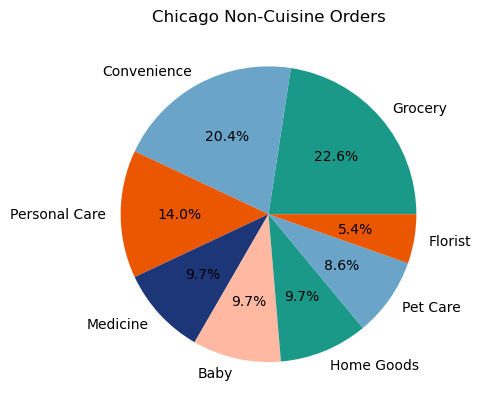

In [146]:
labels = final_CH_con['cuisine']
sizes = final_CH_con['count']
title = ("Chicago Non-Cuisine Orders")
colors = ['#1A9988','#6AA4C8','#EB5600','#1C3678','#FFB8A2']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Chicago Non-Cuisine Orders")
plt.show()

In [103]:
BO = cleaner_dd['searched_metro'] == 'BO'
BO_temp = cleaner_dd['cuisines split'].where(BO)
BO_temp = BO_temp.explode().dropna()
BO_temp.value_counts()
BO_cuisine_types = BO_temp.reset_index()
BO_cuisine_types = BO_cuisine_types.drop(columns='index')
BO_cuisine_types
#all_cuisine_types.values
BO_cuisines = {'cuisine': BO_cuisine_types['cuisines split'].value_counts().index, 'count': BO_cuisine_types['cuisines split'].value_counts().values}
BO_cuisines = pd.DataFrame(BO_cuisines)
final_BO_con = BO_cuisines[BO_cuisines['cuisine'].isin(convenience)]
final_BO_con

,cuisine,count
22,Grocery,34
26,Convenience,29
38,Personal Care,21
49,Home Goods,17
53,Baby,15
58,Medicine,14
169,Pet Care,3
174,Florist,3


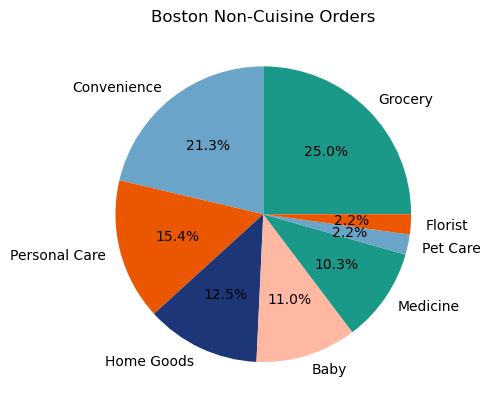

In [151]:
labels = final_BO_con['cuisine']
sizes = final_BO_con['count']
colors = ['#1A9988','#6AA4C8','#EB5600','#1C3678','#FFB8A2']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Boston Non-Cuisine Orders")
plt.show()

In [104]:
LA = cleaner_dd['searched_metro'] == 'LA'
LA_temp = cleaner_dd['cuisines split'].where(LA)
LA_temp = LA_temp.explode().dropna()
LA_temp.value_counts()
LA_cuisine_types = LA_temp.reset_index()
LA_cuisine_types = LA_cuisine_types.drop(columns='index')
LA_cuisine_types
#all_cuisine_types.values
LA_cuisines = {'cuisine': LA_cuisine_types['cuisines split'].value_counts().index, 'count': LA_cuisine_types['cuisines split'].value_counts().values}
LA_cuisines = pd.DataFrame(LA_cuisines)
final_LA_con = LA_cuisines[LA_cuisines['cuisine'].isin(convenience)]
final_LA_con

,cuisine,count
18,Convenience,52
23,Grocery,44
38,Personal Care,25
44,Home Goods,23
61,Baby,15
63,Medicine,14
103,Pet Care,7
337,Florist,1


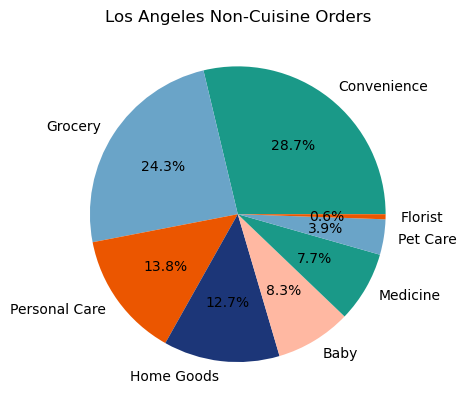

In [150]:
labels = final_LA_con['cuisine']
sizes = final_LA_con['count']
colors = ['#1A9988','#6AA4C8','#EB5600','#1C3678','#FFB8A2']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Los Angeles Non-Cuisine Orders")
plt.show()